# 4.9. Intro to Data Visualization with Python - TASK Part 2

In [ ]:
# T1: Create a new notebook, import the necessary analysis and visualization libraries, 
#     then import your most up-to-date project data (i.e., the data set with your new customer data
#     from the first part of this task).  - Done (see below)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Data
path = r'C:\Users\Emin\Desktop\A  - Career Foundry\Data Immersion\A4 Python Fundamentals for Data Analysts\01-2023 Instacart Basket Analysis'


In [3]:
df_insta = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_clean_data.pkl'))

In [4]:
# Checking the data
df_insta.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both


In [ ]:
# T2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot,
#     and a line chart, using a sample subset for the line chart.

In [13]:
# Checking the required column

df_insta['orders_day_of_week'].describe()

count    3.240486e+07
mean     2.738867e+00
std      2.090077e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: orders_day_of_week, dtype: float64

<AxesSubplot:>

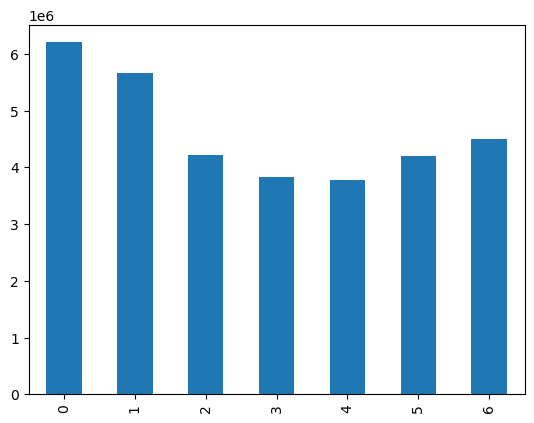

In [14]:
# Creating the bar chart

df_insta['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [15]:
df_insta['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

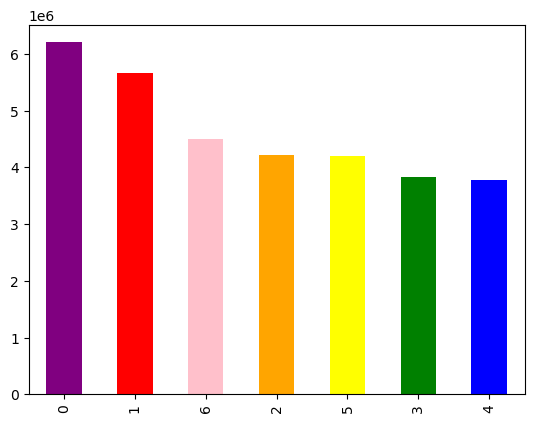

In [16]:
# Adding colors to the bars

bar = df_insta['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

<AxesSubplot:ylabel='Frequency'>

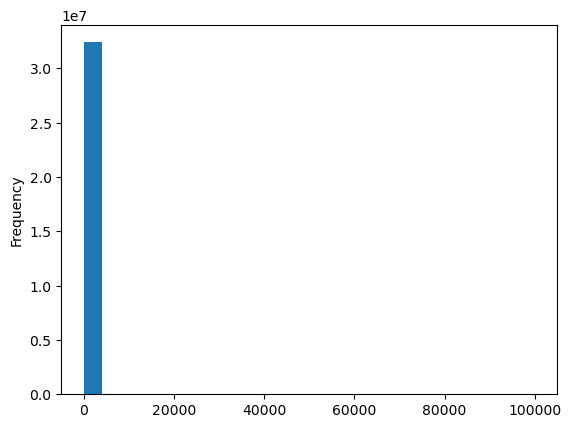

In [17]:
# Creating histogram of "prices" column

df_insta['prices'].plot.hist(bins = 25)

In [18]:
df_insta['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:ylabel='Frequency'>

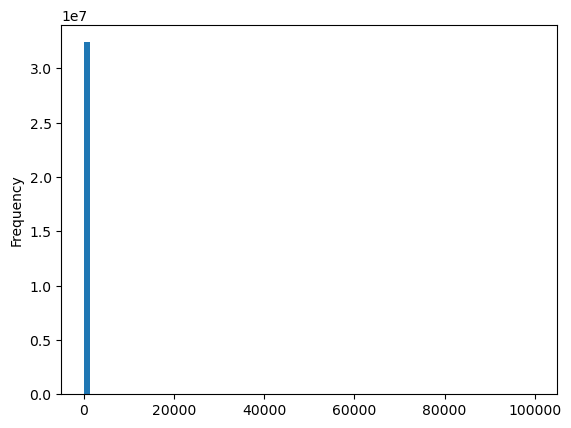

In [19]:
df_insta['prices'].plot.hist(bins = 75)

<AxesSubplot:xlabel='prices', ylabel='prices'>

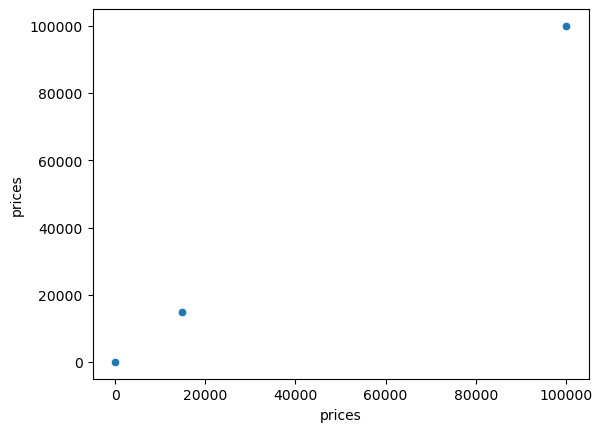

In [20]:
# Creating a Scatterplot graph

sns.scatterplot(x = 'prices', y = 'prices',data = df_insta)

In [21]:
# "Deactivating" the Outliers by replacing by N.A.

df_insta.loc[df_insta['prices'] >100, 'prices'] = np.nan

In [22]:
# Proofing wether above script worked.

df_insta['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

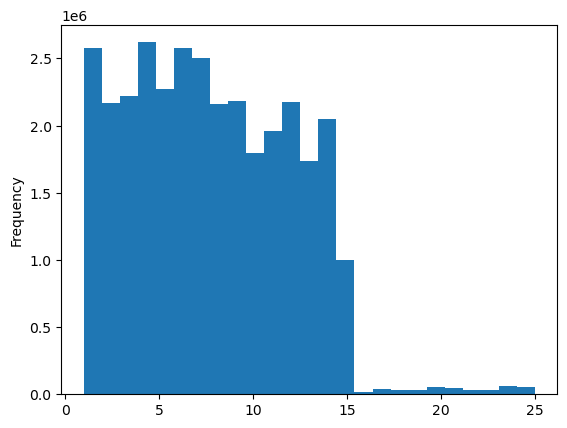

In [23]:
# Selecting only 25 bins, but not accurate visualization of bars. Need more bars. 

df_insta['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

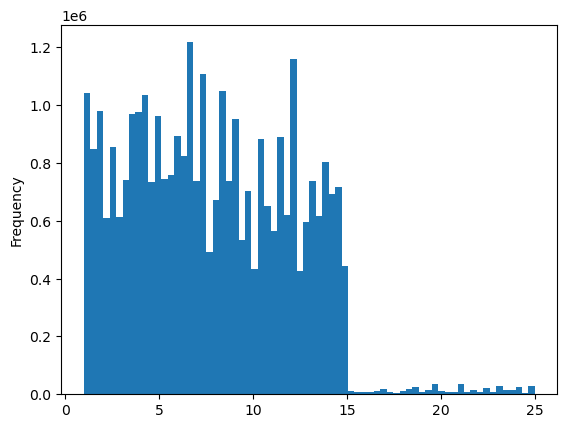

In [24]:
df_insta['prices'].plot.hist(bins = 70)

In [25]:
# Creating Sample Subsets for Line Chart
# Small for 30% of Data and big for the rest (70%).

In [26]:
np.random.seed(4)
dev = np.random.rand(len(df_insta)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [30]:
big = df_insta[dev]
small = df_insta[~dev]

In [31]:
len(big) + len(small)

32404859

In [32]:
df_insta_small = small[['orders_day_of_week','prices']]

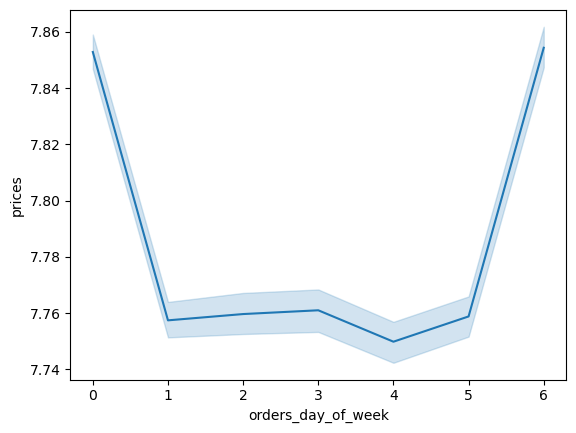

In [33]:
line_small = sns.lineplot(data = df_insta_small, x = 'orders_day_of_week',y = 'prices')

In [34]:
df_insta_big = big[['orders_day_of_week','prices']]

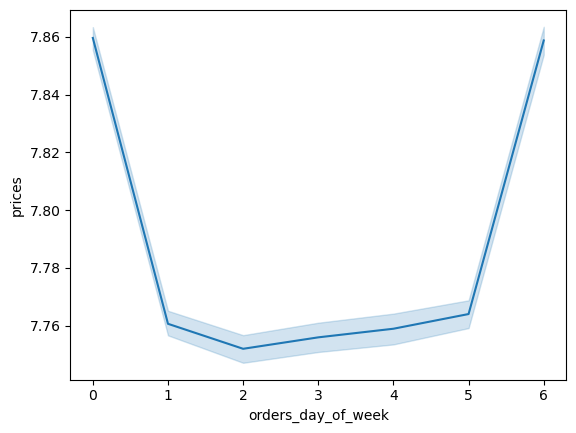

In [36]:
line_big = sns.lineplot(data = df_insta_big, x = 'orders_day_of_week',y = 'prices')

In [ ]:
# Above line charts show, that during the week spends are much lower than on weekends.

In [37]:
# Checking the continuous data

df_insta.describe()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spending,order_frequency,age,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,9.943773e+04
std,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,4.305727e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,2.590300e+04
25%,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,6.700400e+04
50%,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,9.661800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,1.279120e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,5.939010e+05


In [ ]:
# T3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. 
#     Create a histogram of the “order_hour_of_day” column.
#     In a markdown cell beneath your histogram, describe what the histogram demonstrates.

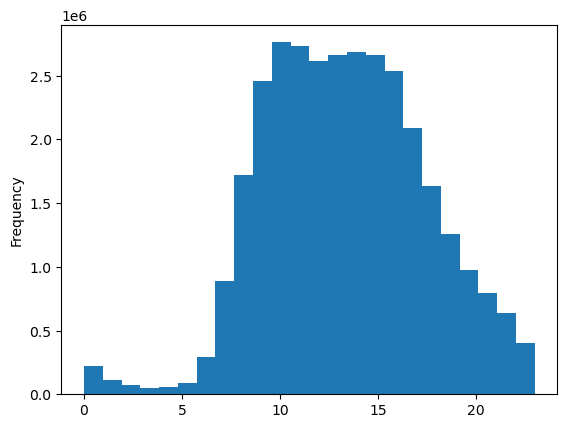

In [43]:
hist_order_hr = df_insta['order_hour_of_day'].plot.hist(bins = 24)

In [ ]:
# T3: Answer: This histogram shows exactly on which hour of the day the orders are on lowest or highest amount. 

In [45]:
hist_order_hr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_orders_hour_of_day'))

In [47]:
df_insta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest day             object  
 15  busiest days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  avg_spending            float64 
 20  spending_flag           object  
 21  order_

In [ ]:
# T4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
#     Create a bar chart from the “loyalty_flag” column.

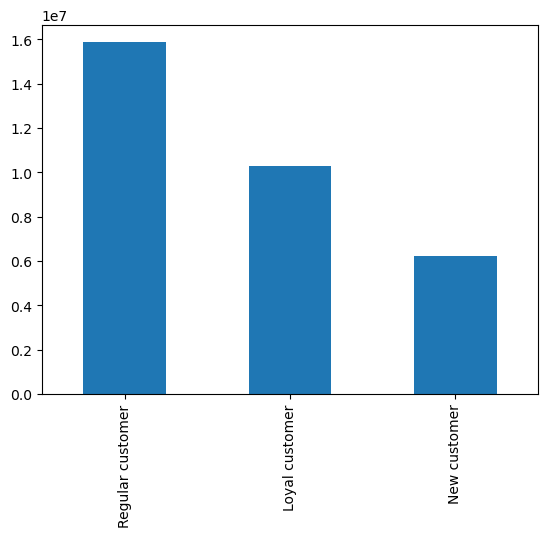

In [71]:
bar_loyalty_flag = df_insta['loyalty_flag'].value_counts().plot.bar()

In [72]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_loyalty_flag'))

In [49]:
# T5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
#     (Hint: To check this, you need to use an accurate sample for your line chart!)

In [50]:
df_insta_small_hour = small[['order_hour_of_day','prices']]

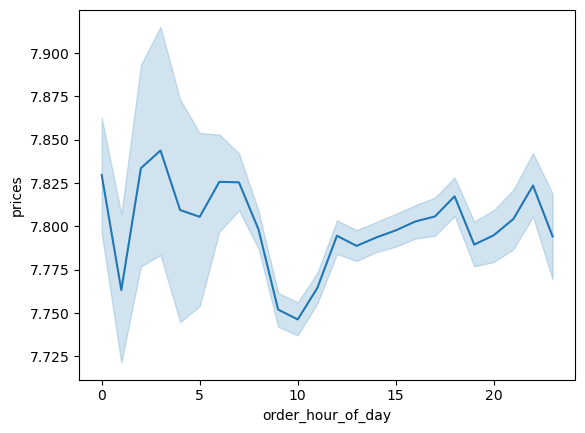

In [52]:
line_small_hour = sns.lineplot(data = df_insta_small_hour, x = 'order_hour_of_day',y = 'prices')

In [54]:
df_insta_big_hour = big[['order_hour_of_day','prices']]

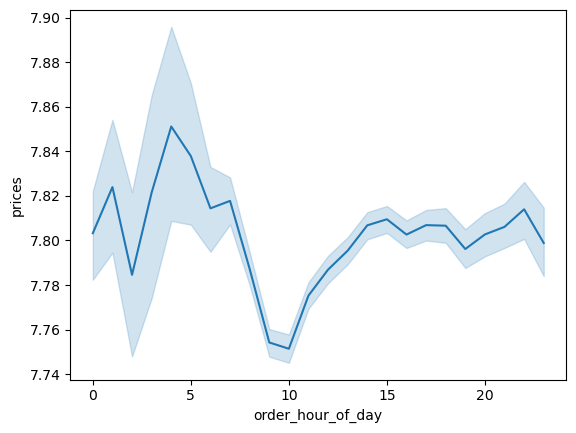

In [55]:
line_big_hour = sns.lineplot(data = df_insta_big_hour, x = 'order_hour_of_day',y = 'prices')

In [ ]:
# T5: Answer: Expenditures are higher in the night and early morgning hours comparing to late afternoon and evening hours.

In [ ]:
# Save line chart to folder

In [56]:
line_big_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_big_hour.png'))

In [57]:
# T6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics
#     to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#     In a markdown cell beneath your line chart, describe what the line chart shows.

In [60]:
# Due to pc memory limitation, I have selected the small sample subset to reduce time of processing.

df_line_fam_age_small = small[['fam_status','age']]

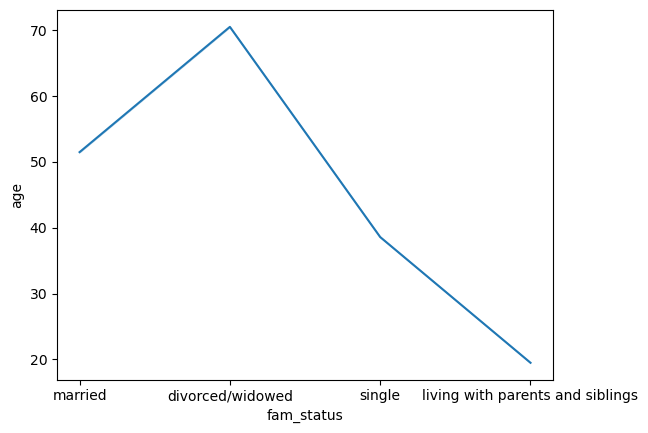

In [61]:
line_fam_age_small = sns.lineplot(data = df_line_fam_age_small, x = 'fam_status',y = 'age')

In [62]:
# Very interesting chart, which is approving the depedence of age and family status. Living with parents and siblings logically 
# at ages lower the (let's say age of 30). Divorced/widowed starting at age of fifty. 

In [63]:
# saving this line chart to folder

line_fam_age_small.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_fam_age_small.png'))

In [ ]:
# T7: You’ll also need to explore whether there’s a connection between age and spending power (income). 
#     To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#     In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [ ]:
# Recalling the attributes

In [64]:
df_insta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest day             object  
 15  busiest days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  avg_spending            float64 
 20  spending_flag           object  
 21  order_

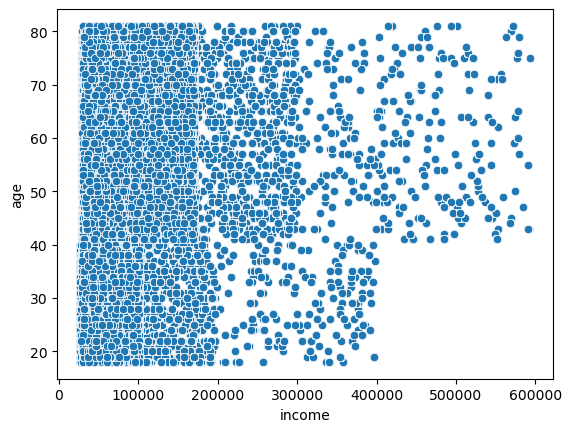

In [67]:
scatterplot_income_age = sns.scatterplot(x = 'income', y = 'age',data = df_insta)

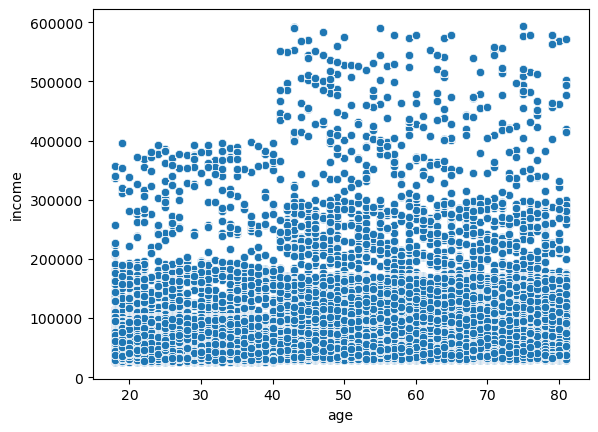

In [68]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_insta)

In [ ]:
# The above scatterplot shows that the average income about 200.000 USD reflects the majority of customers from age 20 to 80.
# But density of people with higer spending power gets thinner than age is increasing. Interesting point is, that higher income
# than average starts at the age of 40 above 400.000 USD per year. 

In [69]:
# saving this scatterplot to folder

scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatterplot_age_income.png'))